In [21]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import csv
import os
import cv2
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import color
from joblib import load


In the following code cell, change imageDirectory to the correct path, and set the correct imgetype variable. This cell loads the dataset and splits it into X, the paths to the image, and y, the labels associated with each image. 

In [22]:
d1 = os.path.join(os.getcwd(), '2022Fheldout', '2022Fheldout')
d2 = os.path.join(os.getcwd(), '2022Fimgs', '2022Fimgs')
d3 = os.path.join(os.getcwd(), '2023Fimgs', '2023Fimgs')
d4 = os.path.join(os.getcwd(), '2023Simgs', 'S2023_imgs')
d5 = os.path.join(os.getcwd(), '2024Simgs', '2024Simgs')

### CHANGE TO CORRECT PATH
imageDirectory = d2
### CHANGE TO ".jpg" IF NEEDED
imgtype = ".png" 
with open(os.path.join(imageDirectory, 'labels.txt'), 'r') as f:
    reader = csv.reader(f)
    # lines = [[imageDirectory +"\\"+ row[0] + imgtype] + row[1:] for row in list(reader)]
    lines = [[os.path.join(imageDirectory, row[0]) + imgtype] + row[1:] for row in list(reader)]

X = [line[0] for line in lines]  # Image paths
y = [line[1] for line in lines]  # Labels

After the following cell, check if the printed path is correct.

In [26]:
def preprocess_image(image_path):
    # Load the image
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    gray_image = color.rgb2gray(img)
    img = cv2.resize(img, (64, 64))
    hsv_image = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    gray_image = cv2.resize(gray_image, (64, 64))
    x, y, w, h = 12, 12, 40, 40
    hog_features = hog(gray_image, orientations=8, pixels_per_cell=(8, 8),
                       cells_per_block=(2, 2), block_norm='L2', feature_vector=True)
    hsv_image = cv2.GaussianBlur(hsv_image, (5, 5), 0)
    hsv_image = hsv_image.flatten()  
    hsv_image = hsv_image / 255.0  # norm 
    features = np.hstack([hog_features, hsv_image]) 
    return features
print("Check if the following path is correct")
print(X[0])

Check if the following path is correct
c:\Users\yadum\GT\Spring 2024\ME 7785\Lab 6\2022Fimgs\2022Fimgs\1.png


Run the following cell to make predictions on the dataset and get the classification report.

In [24]:
X_preprocessed = np.array([preprocess_image(x) for x in X])
y = [int(label) for label in y]

clf = load('classifier_model.joblib')
y_pred = clf.predict(X_preprocessed)

print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        18
           1       0.98      0.98      0.98        42
           2       0.98      1.00      0.99        42
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         9
           5       1.00      1.00      1.00         9

    accuracy                           0.98       129
   macro avg       0.99      0.99      0.99       129
weighted avg       0.98      0.98      0.98       129



Run the following cell to get the confusion matrix.

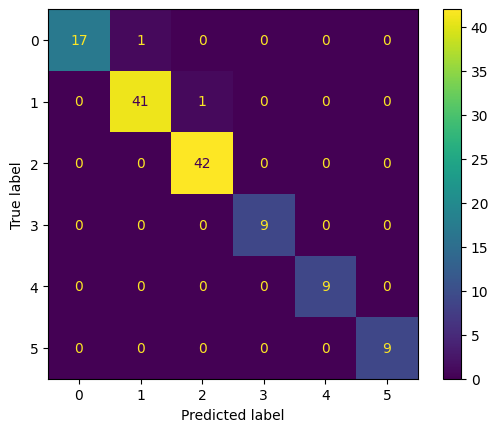

In [25]:
cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()